In [3]:
import pandas as pd

df = pd.read_csv("titanic/train.csv")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Sınıfa göre hayatta kalma oranı
pclass_survival = df.groupby('Pclass')['Survived'].mean()
print(pclass_survival)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [5]:
# Cinsiyete göre hayatta kalma oranı
sex_survival = df.groupby('Sex')['Survived'].mean()
print(sex_survival)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [6]:
# Pivot tablo ile cinsiyet ve sınıfa göre hayatta kalma
pivot_table = df.pivot_table(values='Survived', index='Sex', columns='Pclass')
print(pivot_table)

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


In [12]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Age'].fillna(df['Age'].median())


In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

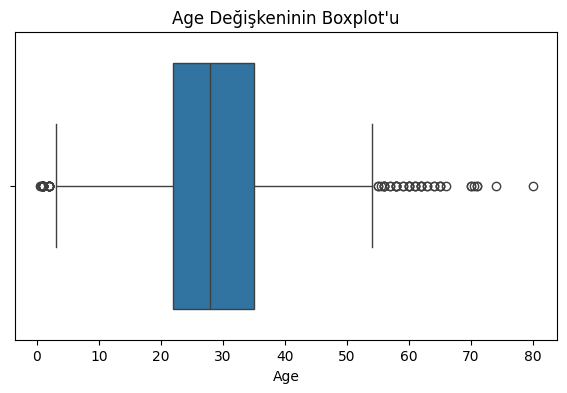

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['Age'])
plt.title("Age Değişkeninin Boxplot'u")
plt.xlabel("Age")
plt.show()

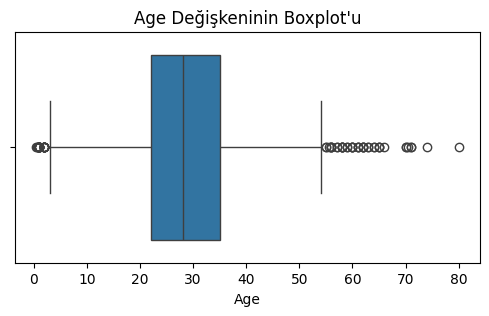

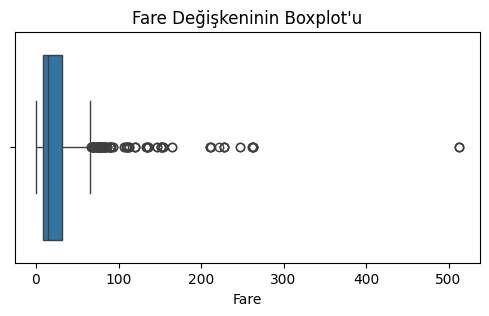

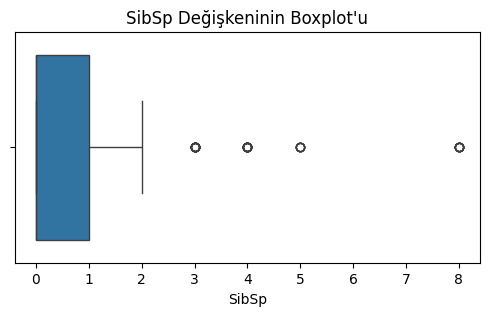

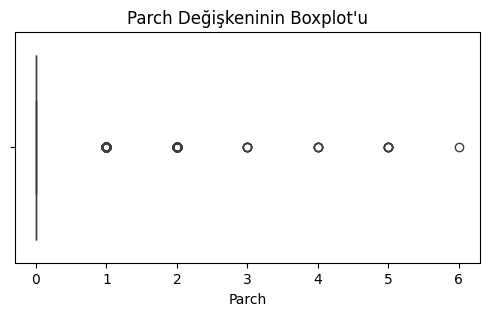

In [21]:
sayisal_sutunlar = ['Age', 'Fare', 'SibSp', 'Parch']
for col in sayisal_sutunlar:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"{col} Değişkeninin Boxplot'u")
    plt.xlabel(col)
    plt.show()


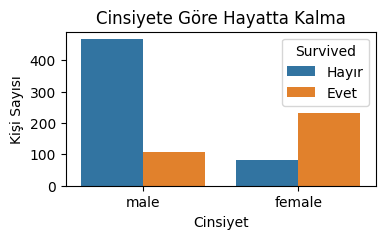

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Cinsiyete Göre Hayatta Kalma")
plt.xlabel("Cinsiyet")
plt.ylabel("Kişi Sayısı")
plt.legend(title="Survived", labels=["Hayır", "Evet"])
plt.show()


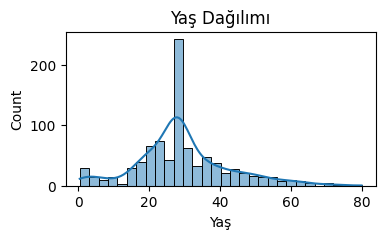

In [26]:
plt.figure(figsize=(4, 2))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.show()


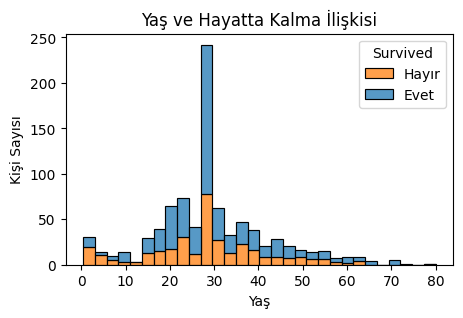

In [27]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title("Yaş ve Hayatta Kalma İlişkisi")
plt.xlabel("Yaş")
plt.ylabel("Kişi Sayısı")
plt.legend(title="Survived", labels=["Hayır", "Evet"])
plt.show()


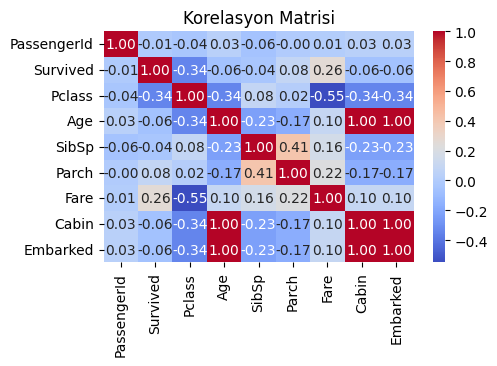

In [28]:
plt.figure(figsize=(5, 3))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()


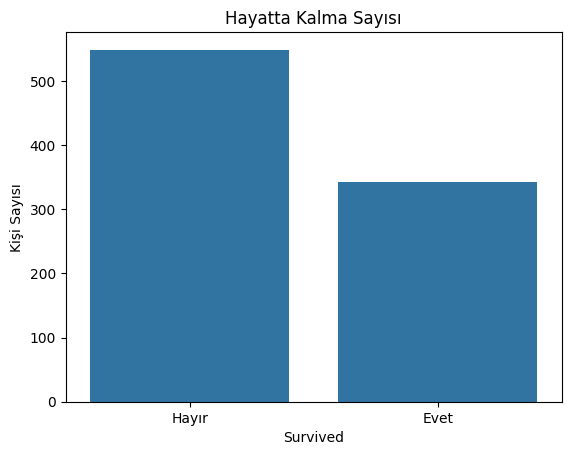

In [33]:
sns.countplot(data=df, x='Survived')
plt.title("Hayatta Kalma Sayısı")
plt.xlabel("Survived")
plt.ylabel("Kişi Sayısı")
plt.xticks([0, 1], ['Hayır', 'Evet'])
plt.show()


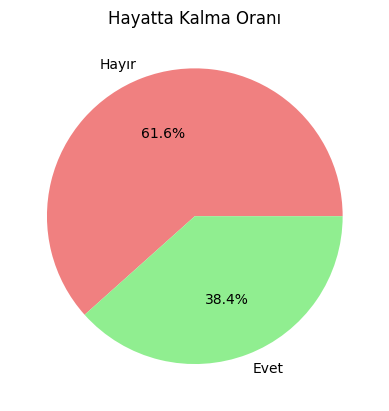

In [34]:
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Hayır', 'Evet'], colors=['lightcoral', 'lightgreen'])
plt.title("Hayatta Kalma Oranı")
plt.ylabel("")
plt.show()

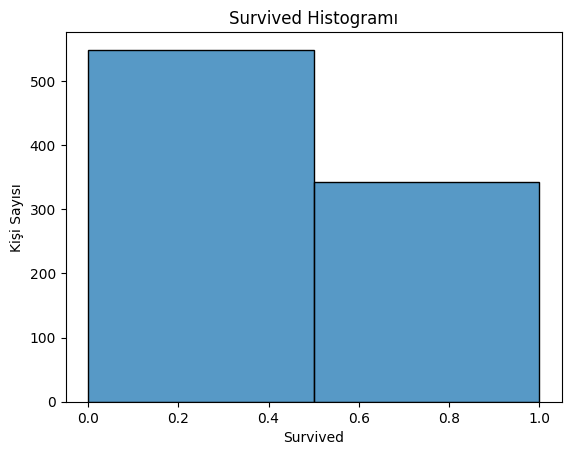

In [35]:
sns.histplot(df['Survived'], bins=2)
plt.title("Survived Histogramı")
plt.xlabel("Survived")
plt.ylabel("Kişi Sayısı")
plt.show()


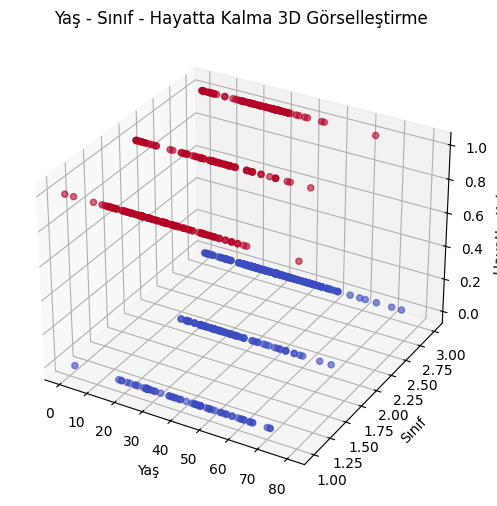

In [37]:


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# NaN'leri düşür
df_3d = df[['Age', 'Pclass', 'Survived']].dropna()

# X = Yaş, Y = Sınıf, Z = Hayatta Kalma
x = df_3d['Age']
y = df_3d['Pclass']
z = df_3d['Survived']

ax.scatter(x, y, z, c=z, cmap='coolwarm', alpha=0.6)
ax.set_xlabel("Yaş")
ax.set_ylabel("Sınıf")
ax.set_zlabel("Hayatta Kalma")

plt.title("Yaş - Sınıf - Hayatta Kalma 3D Görselleştirme")
plt.show()
